<a href="https://colab.research.google.com/github/joshIsac/computervisionlab/blob/main/2348523_CV_lab5_Ideal_low_pass_and_Ideal_high_pass_filter_in_frequency_Domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
imgpath = "/content/drive/MyDrive/avengers.jpg"
img=cv2.imread(imgpath,cv2.IMREAD_GRAYSCALE)

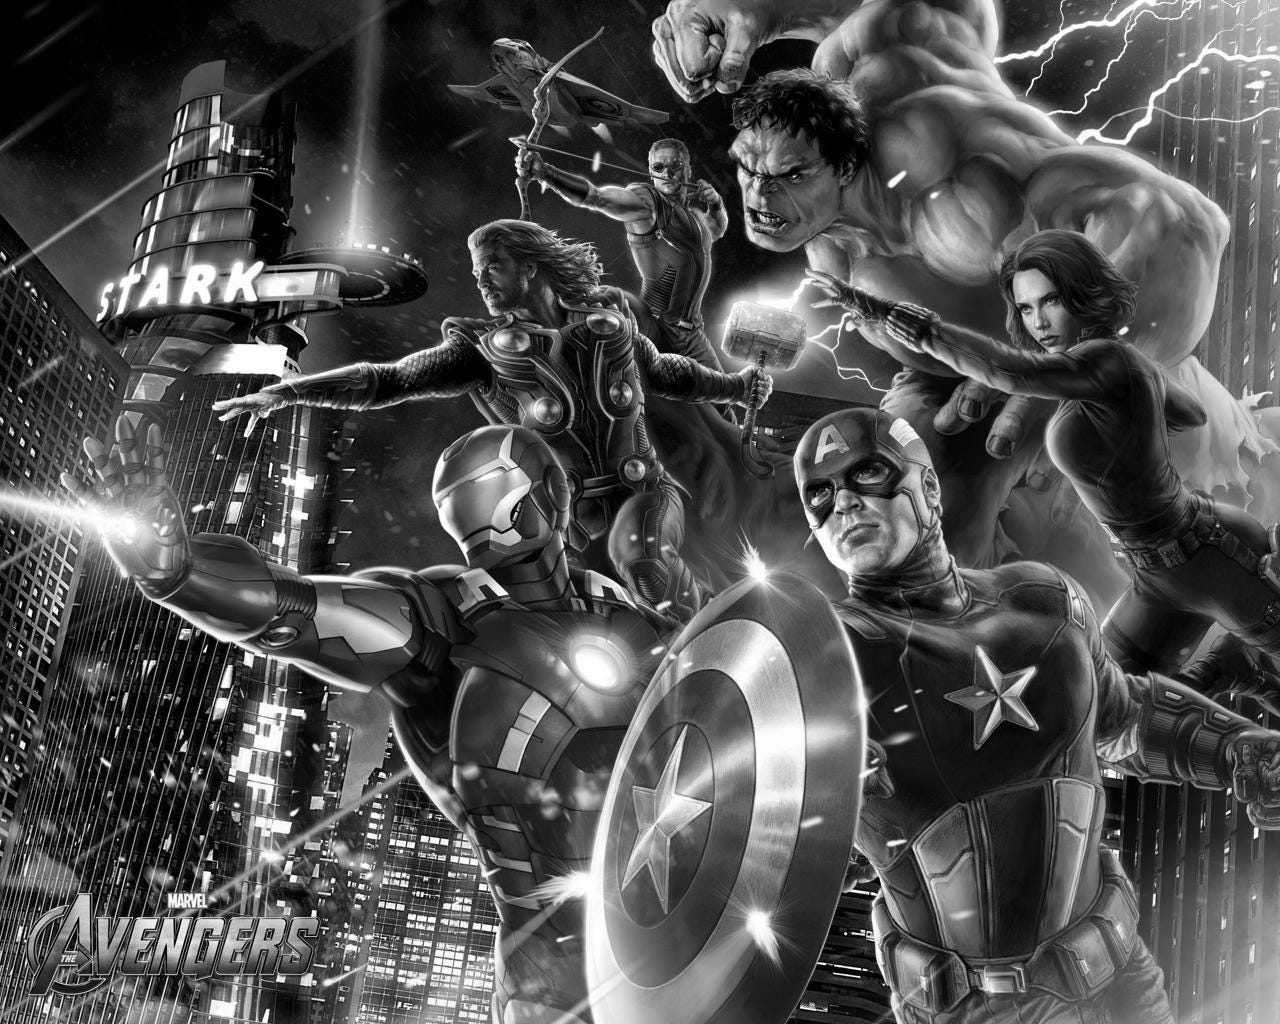

In [ ]:
cv2_imshow(img)

In [ ]:
img.shape

(1024, 1280)

In [ ]:
print(img)

[[  0   0   0 ... 191 186 186]
 [  0   0   0 ... 189 187 188]
 [  0   0   0 ... 183 184 188]
 ...
 [162  21  35 ... 192 190 189]
 [116  19  57 ... 190 190 190]
 [ 73  14  75 ... 190 190 190]]


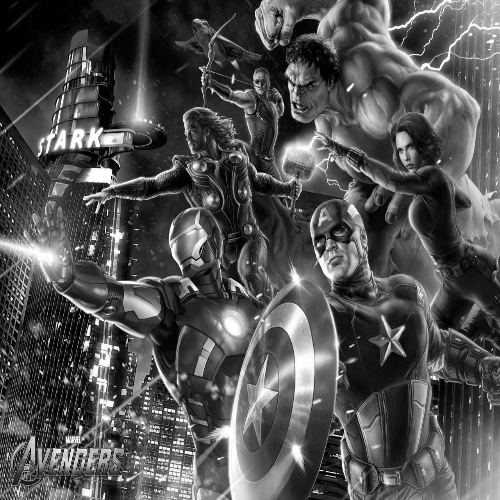

In [ ]:
img=cv2.resize(img,(500,500))
cv2_imshow(img)

In [ ]:
# create a sharpening kernel
kernel=np.array([[-1,-1,-1],
                 [-1,9,-1],
                [-1,-1,-1]])
sharpened = cv2.filter2D(img, -1, kernel)

Sharpened Image


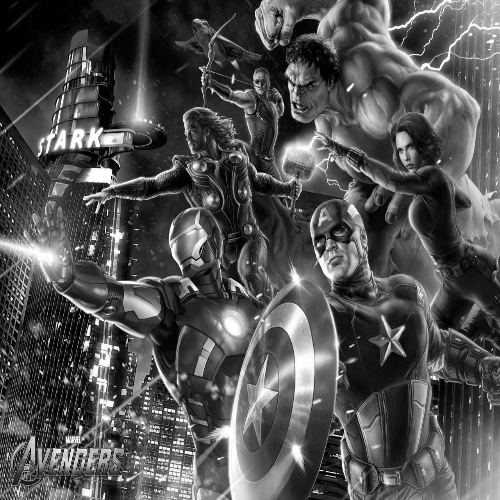

In [ ]:
sharp_image=cv2.filter2D(img,-1,kernel)
print("Sharpened Image")
cv2_imshow(img)
#plt.imshow(cv2.cvtColor(sharp_image, cv2.COLOR_BGR2RGB))
#plt.axis('off')
#plt.show()



Ideal Lowpass Filter (ILPF) is used for image smoothing in the frequency domain. It removes high-frequency noise from a digital image and preserves low-frequency components.

In [ ]:
def ideal_low_pass_filter(image, cutoff_frequency):
    # Compute the 2D Fourier Transform of the input image
    f = np.fft.fft2(img)
    f_shifted = np.fft.fftshift(f)

    # Compute the distance from the center for each point in the Fourier domain
    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - crow)**2 + (j - ccol)**2)
            if distance <= cutoff_frequency:
                mask[i, j] = 1

    # Apply the mask to the Fourier spectrum
    f_filtered = f_shifted * mask

    # Perform inverse Fourier Transform
    f_filtered_shifted = np.fft.ifftshift(f_filtered)
    img_back = np.fft.ifft2(f_filtered_shifted)
    img_back = np.abs(img_back)

    return img_back

The Fourier transform is a representation of an image as a sum of complex exponentials of varying magnitudes, frequencies, and phases. The Fourier transform plays a critical role in a broad range of image processing applications, including enhancement, analysis, restoration, and compression.

If f(m,n) is a function of two discrete spatial variables m and n, then the two-dimensional Fourier transform of f(m,n) is defined by the relationship

The Fourier Transform is an important image processing tool which is used to decompose an image into its sine and cosine components. The output of the transformation represents the image in the Fourier or frequency domain, while the input image is the spatial domain equivalent. In the Fourier domain image, each point represents a particular frequency contained in the spatial domain image.

The Fourier Transform is used in a wide range of applications, such as image analysis, image filtering, image reconstruction and image compression.



In [ ]:
def ideal_high_pass_filter(image, cutoff_frequency):
    # Compute the 2D Fourier Transform of the input image
    f = np.fft.fft2(img)
    f_shifted = np.fft.fftshift(f)

    # Compute the distance from the center for each point in the Fourier domain
    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.ones((rows, cols), np.uint8)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - crow)**2 + (j - ccol)**2)
            if distance <= cutoff_frequency:
                mask[i, j] = 0

    # Apply the mask to the Fourier spectrum
    f_filtered = f_shifted * mask

    # Perform inverse Fourier Transform
    f_filtered_shifted = np.fft.ifftshift(f_filtered)
    img_back = np.fft.ifft2(f_filtered_shifted)
    img_back = np.abs(img_back)

    return img_back

ideal high pass filter Ideal Highpass Filter (IHPF) is used for image sharpening in the frequency domain. Image Sharpening is a technique to enhance the fine details and highlight the edges in a digital image. It removes low-frequency components from an image and preserves high-frequency components. This ideal highpass filter is the reverse operation of the ideal lowpass filter. It can be determined using the following relation- $H_{H P}(u, v)=1-H_{L P}(u, v)$ where,$H_{H P}(u, v)$is the transfer function of the highpass filter and$H_{L P}(u, v)$is the transfer function of the corresponding lowpass filter. The transfer function of the IHPF can be specified by the function- $H(u, v)=\left\{\begin{array}{ll}0 & D(u, v) \leq D_{0} \\ 1 & D(u, v)>D_{0}\end{array}\right.$

In [ ]:
# Perform ideal low-pass filtering with cutoff frequency 50
low_pass_filtered = ideal_low_pass_filter(img, 70)

# Perform ideal high-pass filtering with cutoff frequency 50
high_pass_filtered = ideal_high_pass_filter(img, 70)

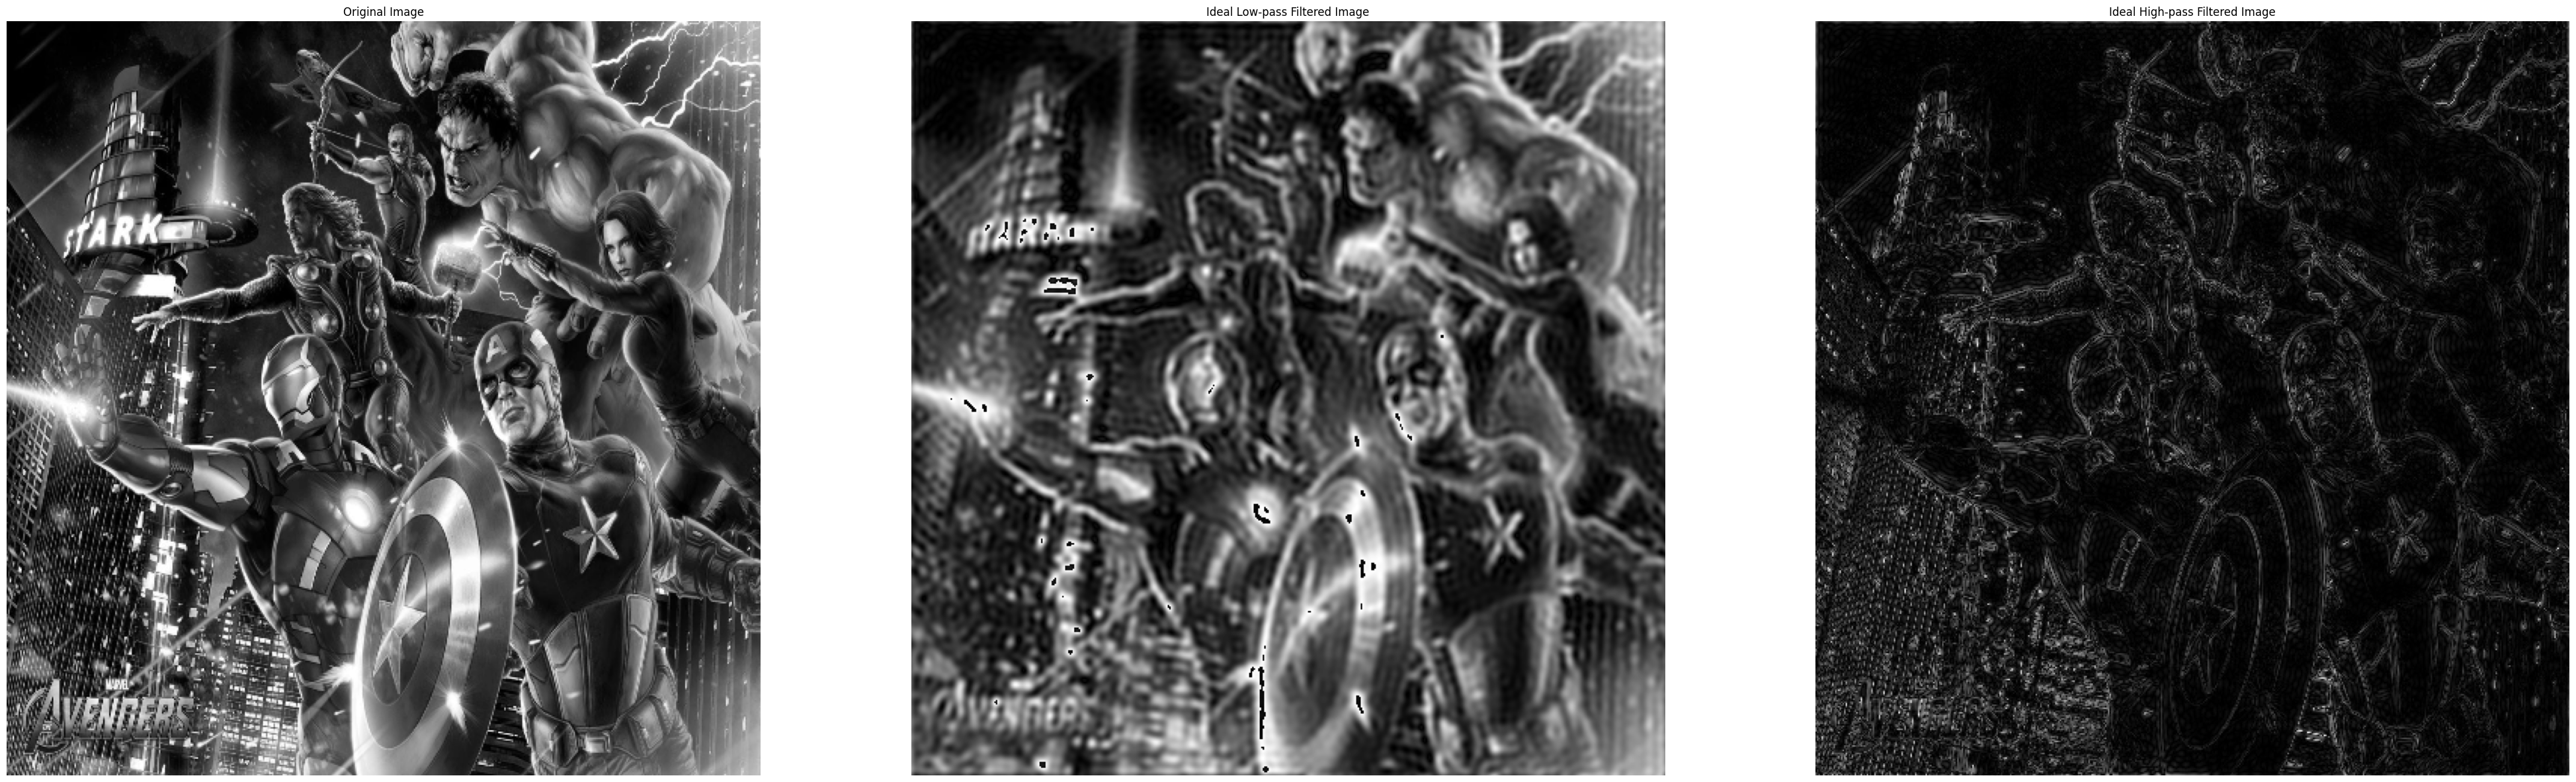

In [ ]:
# Display the original and filtered images using matplotlib
plt.figure(figsize=(50, 25))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(low_pass_filtered.astype(np.uint8), cmap='gray')
plt.title('Ideal Low-pass Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(high_pass_filtered.astype(np.uint8), cmap='gray')
plt.title('Ideal High-pass Filtered Image')
plt.axis('off')

plt.show()